<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-10-21 18:14:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  55.2MB/s    in 3.6s    

2025-10-21 18:15:01 (56.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


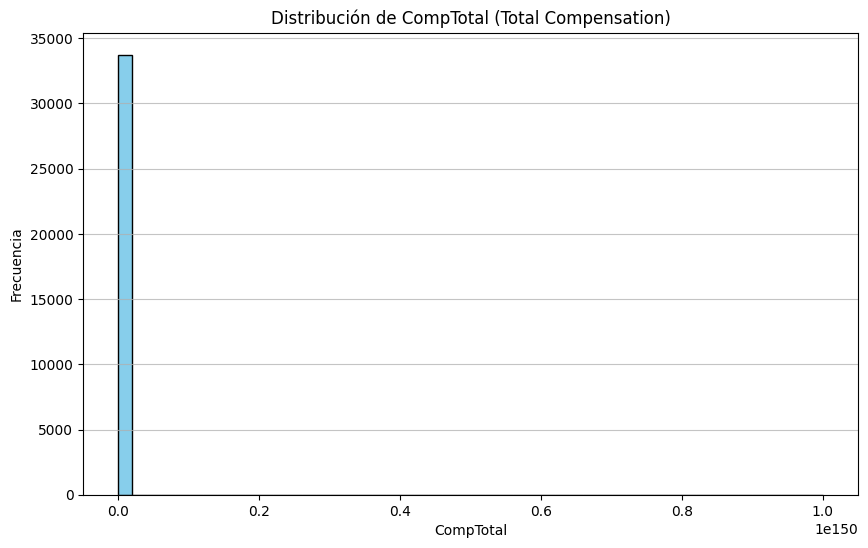

In [9]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')

# Leer la columna CompTotal
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp = pd.read_sql_query(QUERY, conn)

# Histograma básico con matplotlib
plt.figure(figsize=(10,6))
plt.hist(df_comp['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de CompTotal (Total Compensation)')
plt.xlabel('CompTotal')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


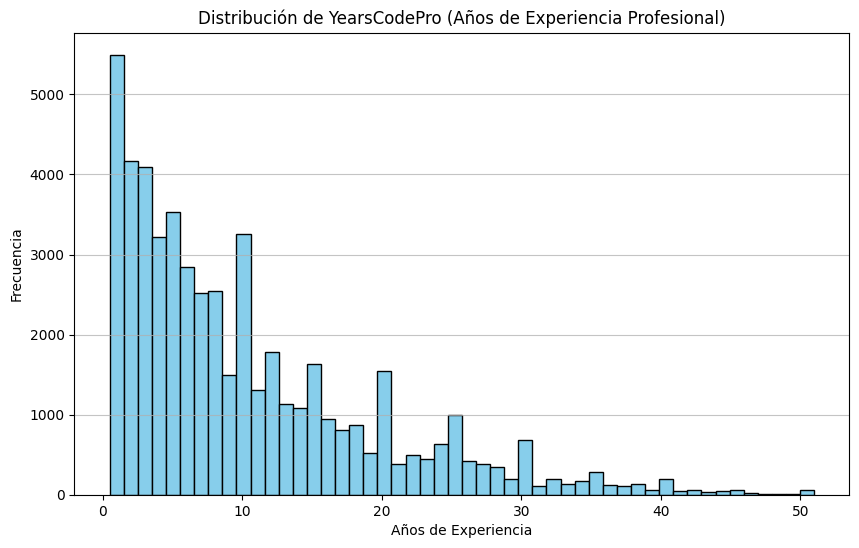

In [10]:
## Write your code here
# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer YearsCodePro
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df_years = pd.read_sql_query(QUERY, conn)

# Función para convertir texto a números
def convert_years(x):
    if x.lower() == 'less than 1 year':
        return 0.5
    elif x.lower() == 'more than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df_years['YearsCodeProNum'] = df_years['YearsCodePro'].apply(convert_years)
df_years = df_years.dropna(subset=['YearsCodeProNum'])

# Histograma con matplotlib
plt.figure(figsize=(10,6))
plt.hist(df_years['YearsCodeProNum'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de YearsCodePro (Años de Experiencia Profesional)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


AgeGroup
<25      0
25-34    0
35-44    0
45-54    0
55-64    0
65+      0
Name: count, dtype: int64


/tmp/ipykernel_888/3182809349.py:52: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


ValueError: No objects to concatenate

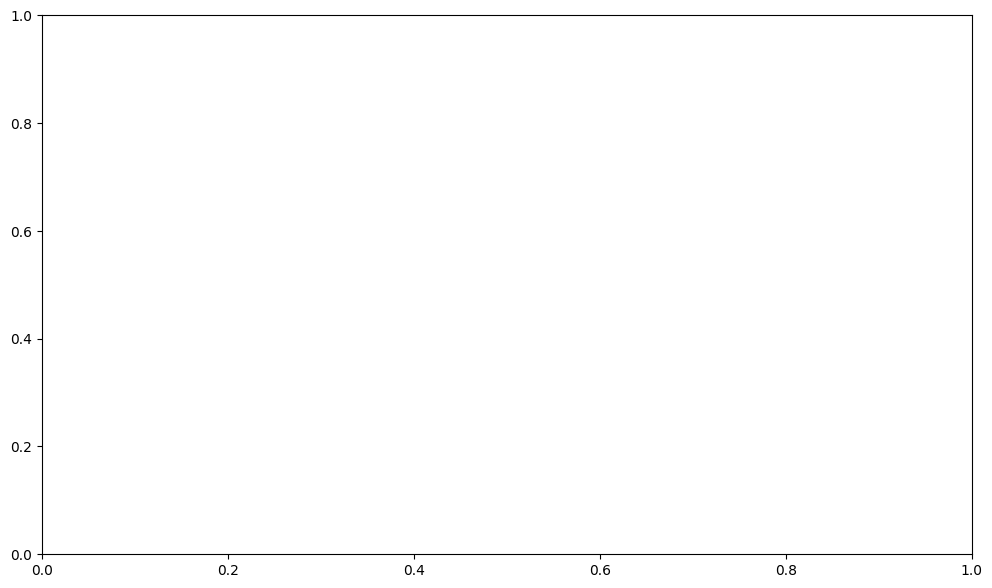

In [15]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer CompTotal y Age
QUERY = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Asegurarnos de que CompTotal sea numérico
df = df[pd.to_numeric(df['CompTotal'], errors='coerce').notnull()]
df['CompTotal'] = df['CompTotal'].astype(float)

# Función robusta para convertir Age a número
def convert_age(x):
    if isinstance(x, str):
        x = x.strip()
        if x.lower() == 'under 18':
            return 17
        elif x.lower() in ['65 or older', '65+']:
            return 65
        try:
            return int(x)
        except:
            return None
    elif isinstance(x, (int, float)):
        return int(x)
    else:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)
df = df.dropna(subset=['AgeNum'])  # eliminar filas sin edad válida

# Crear grupos de edad
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels, right=True)

# Verificar que haya datos por grupo de edad
print(df['AgeGroup'].value_counts())

# Histograma comparativo con escala logarítmica
plt.figure(figsize=(12,7))
sns.histplot(
    data=df, 
    x='CompTotal', 
    hue='AgeGroup', 
    bins=50, 
    multiple='stack',  # permite ver todos los grupos apilados
    palette='Set2', 
    alpha=0.7
)
plt.xscale('log')  # escala logarítmica para mejor visualización
plt.title('Comparación de CompTotal por Grupo de Edad (escala log)')
plt.xlabel('CompTotal (log scale)')
plt.ylabel('Frecuencia')
plt.legend(title='Grupo de Edad')
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


Categorías de Age disponibles:
Age
25-34 years old       10369
35-44 years old        6231
18-24 years old        3433
45-54 years old        2329
55-64 years old         863
65 years or older       137
Under 18 years old       64
Prefer not to say         9
Name: count, dtype: int64


/tmp/ipykernel_888/3311217486.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Grupo de Edad')


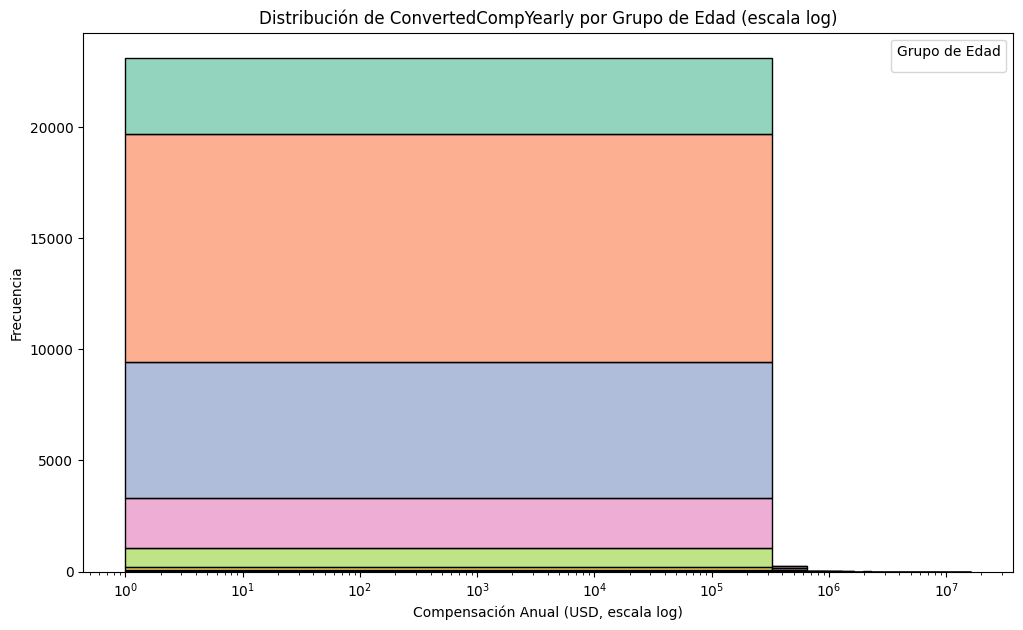

In [29]:
## Write your code here
# Activar modo inline para gráficos en Jupyter
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer Age y ConvertedCompYearly
QUERY = """
SELECT Age, ConvertedCompYearly 
FROM main 
WHERE ConvertedCompYearly IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Filtrar valores válidos
df = df[df['ConvertedCompYearly'] > 0]  # eliminar valores <= 0

# Revisar categorías de edad
print("Categorías de Age disponibles:")
print(df['Age'].value_counts())

# Histograma comparativo por grupo de edad
plt.figure(figsize=(12,7))
sns.histplot(
    data=df,
    x='ConvertedCompYearly',
    hue='Age',
    bins=50,
    multiple='stack',  # apilado para ver contribución de cada grupo
    palette='Set2',
    alpha=0.7
)
plt.xscale('log')  # escala logarítmica para compensaciones muy altas
plt.title('Distribución de ConvertedCompYearly por Grupo de Edad (escala log)')
plt.xlabel('Compensación Anual (USD, escala log)')
plt.ylabel('Frecuencia')
plt.legend(title='Grupo de Edad')
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


Top 5 bases de datos más deseadas:
DatabaseWantToWorkWith
PostgreSQL              3738
PostgreSQL;SQLite       1533
SQLite                  1476
Microsoft SQL Server    1431
MySQL                   1139
Name: count, dtype: int64


/tmp/ipykernel_888/1461983439.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=db_counts.values, y=db_counts.index, palette='Set2')


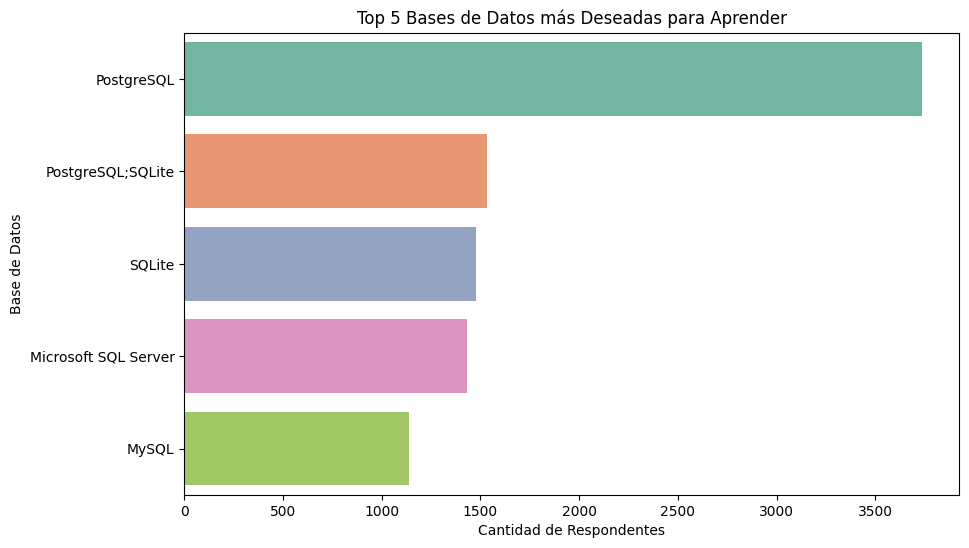

In [30]:
## Write your code here
# Activar modo inline para gráficos
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer DatabaseWantToWorkWith
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Contar frecuencia de cada base de datos
db_counts = df['DatabaseWantToWorkWith'].value_counts().head(5)  # top 5

print("Top 5 bases de datos más deseadas:")
print(db_counts)

# Histograma / gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=db_counts.values, y=db_counts.index, palette='Set2')
plt.title('Top 5 Bases de Datos más Deseadas para Aprender')
plt.xlabel('Cantidad de Respondentes')
plt.ylabel('Base de Datos')
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


Distribución de preferencias de trabajo remoto:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


/tmp/ipykernel_888/166047460.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_counts.values, y=remote_counts.index, palette='Set2')


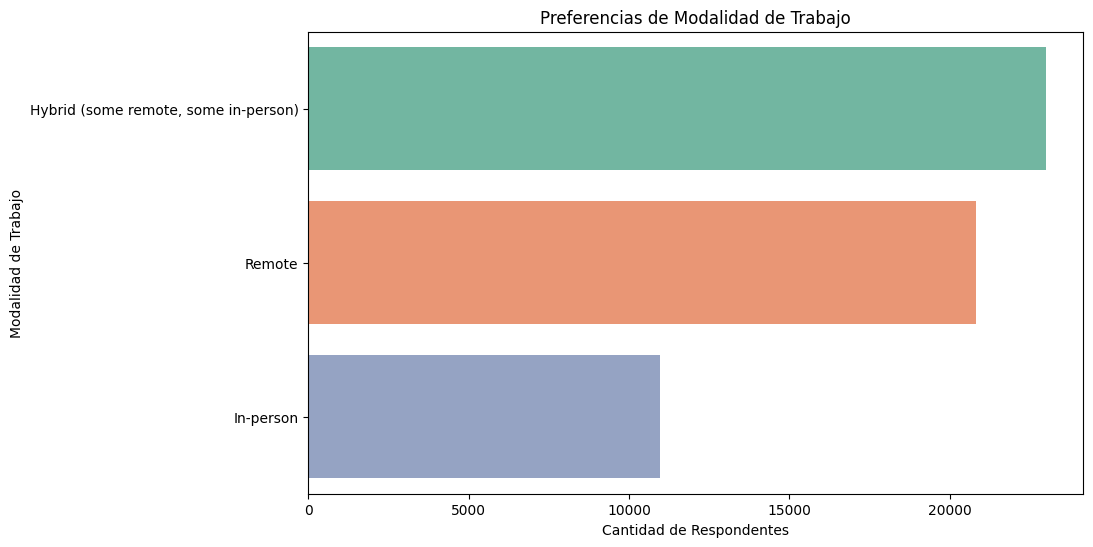

In [31]:
## Write your code here
# Activar modo inline para gráficos
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer RemoteWork
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Contar frecuencia de cada modalidad
remote_counts = df['RemoteWork'].value_counts()

print("Distribución de preferencias de trabajo remoto:")
print(remote_counts)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=remote_counts.values, y=remote_counts.index, palette='Set2')
plt.title('Preferencias de Modalidad de Trabajo')
plt.xlabel('Cantidad de Respondentes')
plt.ylabel('Modalidad de Trabajo')
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


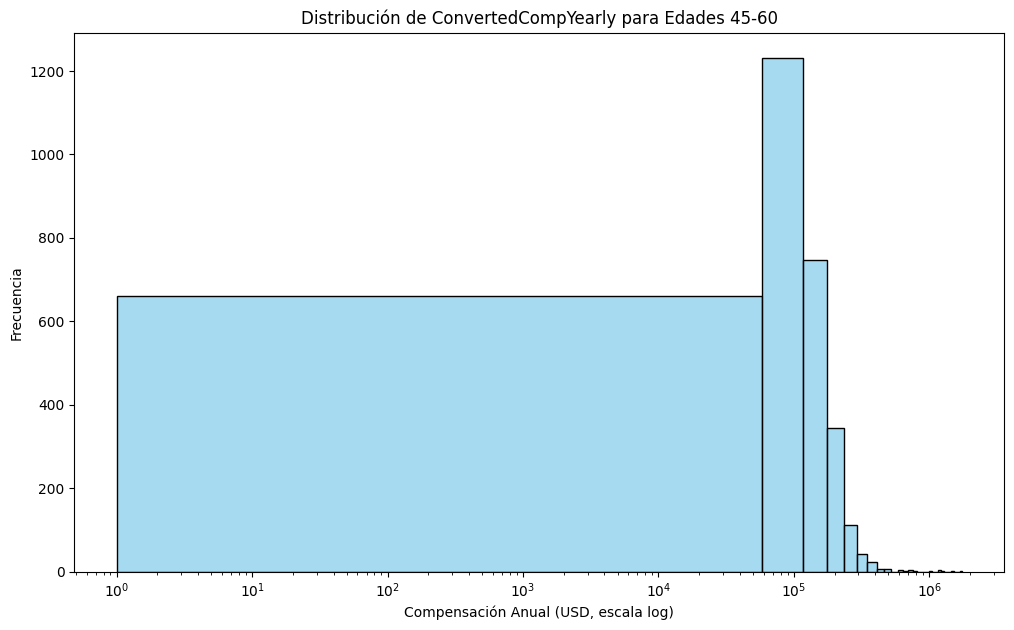

In [32]:
## Write your code here
# Activar modo inline para gráficos
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer Age y ConvertedCompYearly
QUERY = """
SELECT Age, ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Filtrar compensaciones válidas
df = df[df['ConvertedCompYearly'] > 0]

# Filtrar grupo de edad 45-60
df_midcareer = df[df['Age'].isin(['45-54 years old', '55-64 years old'])]

# Histograma del grupo de edad 45-60
plt.figure(figsize=(12,7))
sns.histplot(
    data=df_midcareer,
    x='ConvertedCompYearly',
    bins=30,
    kde=False,
    color='skyblue'
)
plt.xscale('log')  # Escala logarítmica para compensaciones altas
plt.title('Distribución de ConvertedCompYearly para Edades 45-60')
plt.xlabel('Compensación Anual (USD, escala log)')
plt.ylabel('Frecuencia')
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


Categorías de YearsCodePro disponibles:
YearsCodeProCat
3                     2261
2                     2153
5                     2016
10                    1918
4                     1866
6                     1725
8                     1588
7                     1533
1                     1173
12                    1111
9                      973
15                     935
20                     819
11                     806
Less than 1 year       780
13                     703
14                     629
16                     577
18                     526
25                     505
17                     481
24                     343
30                     318
19                     312
22                     275
23                     258
26                     243
21                     216
27                     212
28                     170
35                     122
29                     100
32                     100
40                      90
33                      72

/tmp/ipykernel_888/461563056.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Años de Experiencia')


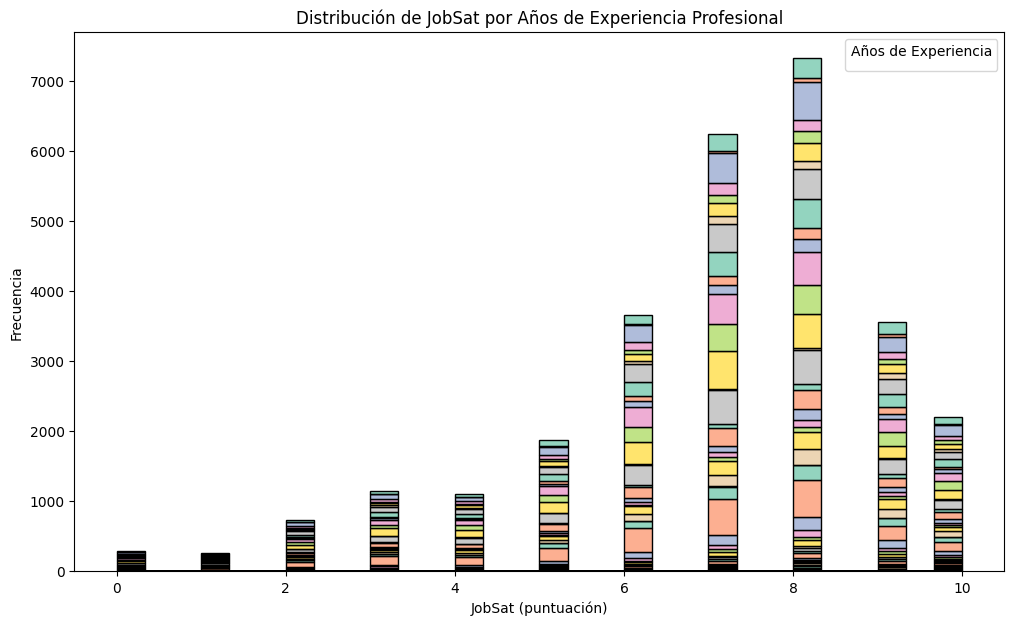

In [37]:
## Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Leer JobSat y YearsCodePro
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Convertir JobSat a numérico y filtrar valores inválidos
df = df[pd.to_numeric(df['JobSat'], errors='coerce').notnull()]
df['JobSat'] = df['JobSat'].astype(float)

# Convertir YearsCodePro a categoría (texto)
df['YearsCodeProCat'] = df['YearsCodePro'].astype(str)

# Revisar categorías
print("Categorías de YearsCodePro disponibles:")
print(df['YearsCodeProCat'].value_counts())

# Histograma comparativo de JobSat por años de experiencia
plt.figure(figsize=(12,7))
sns.histplot(
    data=df,
    x='JobSat',
    hue='YearsCodeProCat',
    bins=30,
    multiple='stack',
    palette='Set2',
    alpha=0.7
)
plt.title('Distribución de JobSat por Años de Experiencia Profesional')
plt.xlabel('JobSat (puntuación)')
plt.ylabel('Frecuencia')
plt.legend(title='Años de Experiencia')
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
